<a href="https://colab.research.google.com/github/Malaika-05/AI-Training/blob/main/Week02_task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Part 1: The Automated Summary (Coding)
import numpy as np

In [2]:
data = [4.2, 5.1, 3.8, 7.2, 5.5, 6.0]
def summarize_clinic(data):
  data_mean = np.mean(data)
  data_std = np.std(data)
  return data_mean,data_std

In [3]:
mean,std = summarize_clinic(data)
print("Mean : ",mean)
print("Standard deviation : ",std)

Mean :  5.3
Standard deviation :  1.1284207253207172


In [4]:
# Add the outlier
data.append(15.0)
mean_new , std_new = summarize_clinic(data)
print("After adding the outlier")
print("Mean : ",mean_new)
print("Standard deviation : ",std_new)

After adding the outlier
Mean :  6.685714285714285
Standard deviation :  3.55142972072157


In [5]:
# Part 2: Visualizing the ”Compass”
import numpy as np
import matplotlib.pyplot as plt


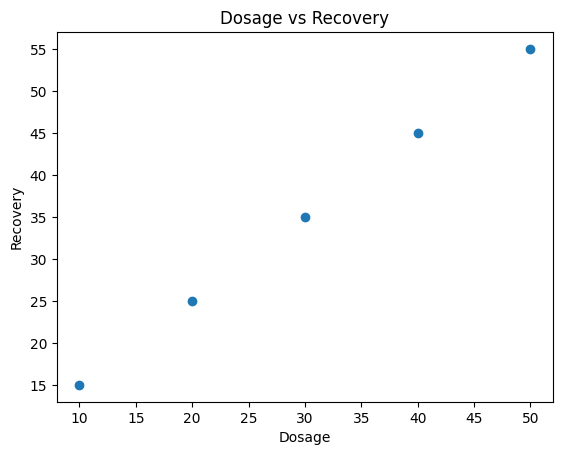

In [6]:
dosage = np.array([10, 20, 30, 40, 50])
recovery = np.array([15, 25, 35, 45, 55])
plt.scatter(dosage,recovery)
plt.xlabel("Dosage")
plt.ylabel("Recovery")
plt.title("Dosage vs Recovery")
plt.show()

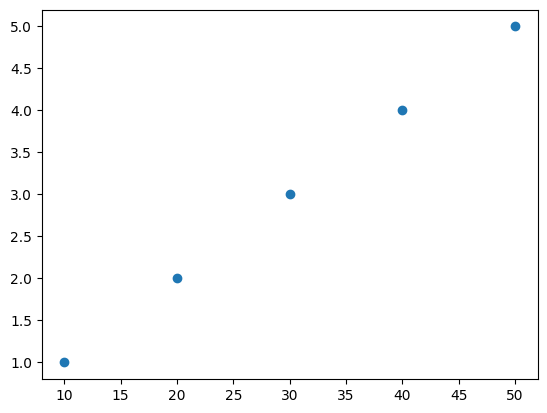

In [7]:
w = 0.1
prediction = w * dosage
plt.scatter(dosage,prediction)

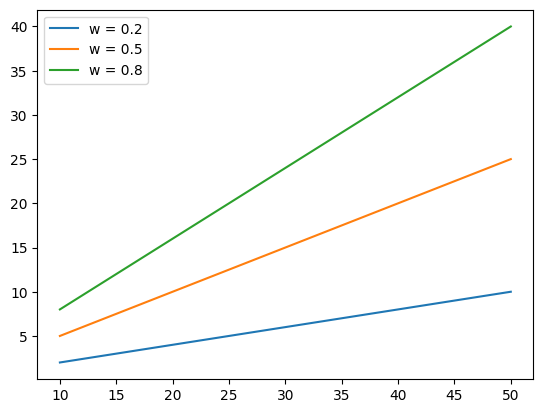

In [8]:
weights = [0.2, 0.5, 0.8]
for w in weights:
    prediction = w * dosage
    plt.plot(dosage, prediction, label=f"w = {w}")
plt.legend()
plt.show()

Task 1: The ”Bug Hunt”
Below is a snippet of the Gradient Descent loop from our lab. One line has a logical error that prevents
the ”Compass” from working correctly. Find it and fix it.
# BUGGY CODE SNIPPET
learning_rate = 0.01

weight = 0.5

for i in range (100) :

  gradient = calculate_gradient ( data , weight )
  # Logic Error is in the line below :
  weight = weight + ( learning_rate * gradient )
  print ( f" Iteration ␣{i} ,␣ Loss :␣{ calculate_loss ( weight )}")

Requirement: Explain in 1 sentence why adding the gradient instead of subtracting it makes the
model ”climb the hill” instead of ”finding the bottom.”


# Answer
Adding the gradient moves the weights in the direction of increasing loss (uphill), while subtracting moves them toward the minimum (downhill).

# Task 2: Testing the ”Step Size”


In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
data = np.array([(10,50),(20,100),(30,150),(40,200),(50,250)])

In [12]:
def calculate_loss(weight):
    x = data[:, 0]
    y = data[:, 1]
    y_pred = weight * x
    return np.mean((y - y_pred) ** 2)

In [16]:
def calculate_gradient(weight):
    x = data[:, 0]
    y = data[:, 1]
    y_pred = weight * x
    return -2 * np.mean(x * (y - y_pred))


In [17]:
def train(learning_rate):
    weight = 0.5
    losses = []

    for i in range(100):
        grad = calculate_gradient(weight)

        # ✅ FIXED (subtract)
        weight = weight - learning_rate * grad

        losses.append(calculate_loss(weight))

    return losses

/tmp/ipython-input-955473280.py:5: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


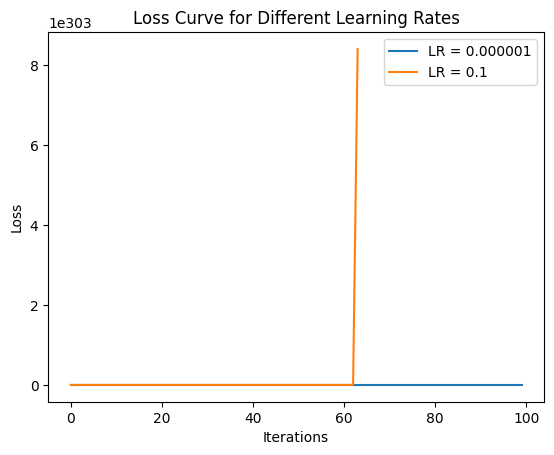

In [18]:
loss_slow = train(0.000001)
loss_fast = train(0.1)


# plot
plt.figure()
plt.plot(loss_slow, label="LR = 0.000001")
plt.plot(loss_fast, label="LR = 0.1")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve for Different Learning Rates")
plt.legend()

plt.show()
